<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Takeo_P_01_10_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thursday January 10, 2024**

**Polynomial Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries 1.csv to Position_Salaries 1.csv


In [3]:
filename = next(iter(uploaded))

In [4]:
df = pd.read_csv(filename)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

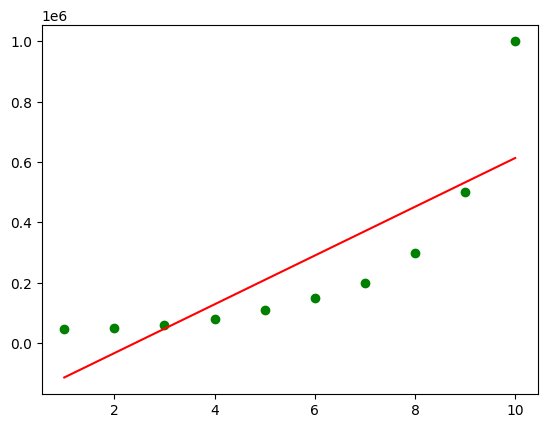

In [7]:
plt.scatter(X, y, color = 'green')
plt.plot(X, lin_reg.predict(X), color = 'red')

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

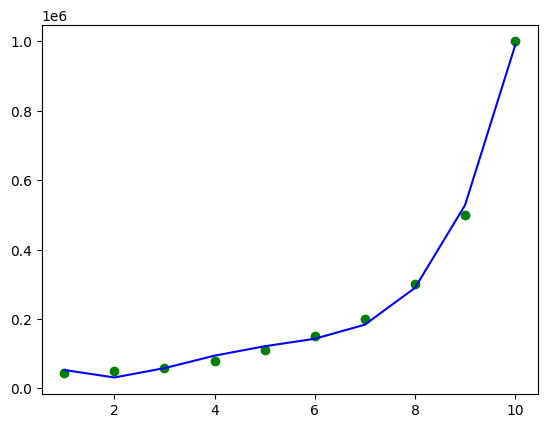

In [9]:
plt.scatter(X, y, color = 'green')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')

In [10]:
lin_reg.predict([[5.5]])

array([249500.])

In [11]:
lin_reg_2.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750002])

**Support Vector Regression (SVR)**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

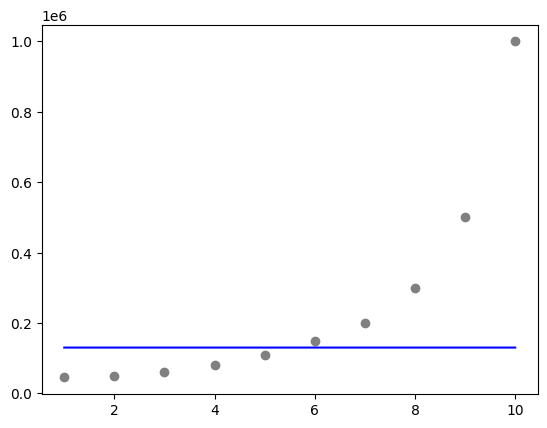

In [18]:
plt.scatter(X, y, color='grey')
plt.plot(X,regressor.predict(X), color = 'blue')

In [17]:
regressor.predict([[5.5]])

array([130000.])

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [20]:
X, y

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

In [28]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [29]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[5.5]])).reshape(-1,1))

array([[131106.77303274]])

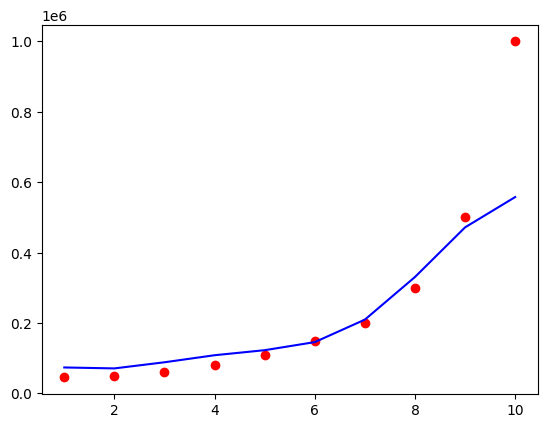

In [30]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')

**Decision Tree**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries 1.csv to Position_Salaries 1 (1).csv


In [33]:
filename = next(iter(uploaded))

In [34]:
df = pd.read_csv(filename)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [35]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [37]:
regressor.predict([[5.5]])

array([110000.])

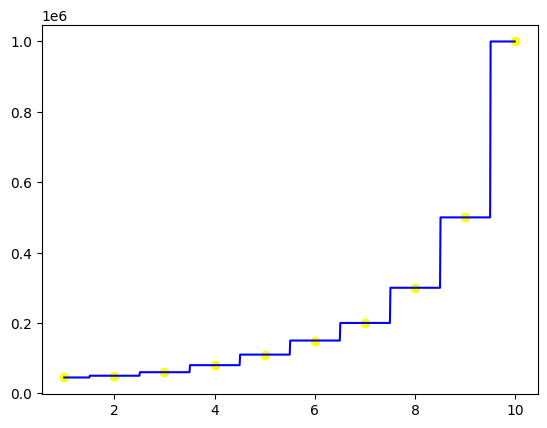

In [38]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color='yellow')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')

**Random Forest Regression**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries 1.csv to Position_Salaries 1 (2).csv


In [45]:
filename = next(iter(uploaded))

In [46]:
df = pd.read_csv(filename)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [47]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
regressor.predict([[5.5]])

array([108000.])

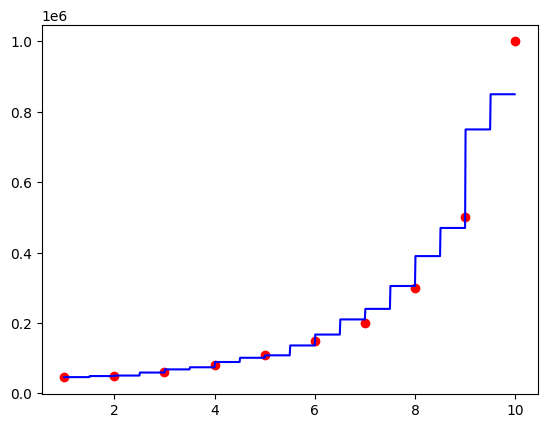

In [50]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')